In [1]:
from pyvis.network import Network
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

<h1>Analisi del grafo</h1>

In [27]:
with open("./grafi_pickle/G_unificato.pkl", "rb") as f:
    G_informatica_matematica_fisica = pickle.load(f)

<h2>Degree Centrality</h2>

In [28]:
deg_dict = dict(G_informatica_matematica_fisica.degree())
degree_centrality = nx.degree_centrality(G_informatica_matematica_fisica)

In [29]:
df_analisi_grafo = pd.DataFrame.from_dict(deg_dict, orient = 'index', columns=['Degree'])
df_analisi_grafo.insert(1, 'Degree Centrality', degree_centrality)


<h2>Betweenness</h2>

In [30]:
betweenness = nx.betweenness_centrality(G_informatica_matematica_fisica, normalized=True, weight='weight')
# betw è un dict: {nodo: valore}

In [31]:
df_analisi_grafo.insert(2, 'Betweenness Centrality', betweenness)

<h2>Closeness</h2>

In [32]:
# --- Calcolo closeness non pesata ---
closeness_unw = nx.closeness_centrality(G_informatica_matematica_fisica)

# --- Verifica se il grafo ha pesi sugli archi ---
has_weight = any("weight" in data for _, _, data in G_informatica_matematica_fisica.edges(data=True))

# --- Calcolo closeness pesata (se ci sono pesi) ---
if has_weight:
    # NetworkX interpreta 'distance=' come distanza da minimizzare.
    # Se i pesi rappresentano distanza → usa direttamente distance='weight'
    # Se i pesi rappresentano forza → usa la conversione 1/weight
    for u, v, data in G_informatica_matematica_fisica.edges(data=True):
        w = data['weight']
        data['distance'] = 1 / w if w != 0 else float("inf")

    closeness_w = nx.closeness_centrality(G_informatica_matematica_fisica, distance='distance')
else:
    closeness_w = None

df_analisi_grafo.insert(3, 'Closeness Centrality', closeness_w)

In [33]:
df_analisi_grafo = df_analisi_grafo.reset_index().rename(columns={"index": "Nodi"})
df_analisi_grafo.to_csv("analisi_grafo.csv")
df_analisi_grafo

,Nodi,Degree,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,Roitero Kevin,5,0.142857,0.000000,5.222317
1,Maddalena Eddy,3,0.085714,0.000000,5.041670
2,Mizzaro Stefano,8,0.228571,0.077311,5.338799
3,Coppola Paolo,5,0.142857,0.040336,4.668070
4,Della Mea Vincenzo,6,0.171429,0.057143,5.069107
5,Serra Giuseppe,7,0.200000,0.383193,5.646402
6,Scagnetto Ivan,8,0.228571,0.246218,5.123865
7,Fusiello Andrea,2,0.057143,0.063025,2.837399
8,Brajnik Giorgio,3,0.085714,0.244538,4.445077
9,Chittaro Luca,6,0.171429,0.326891,4.788265


<h2>Distribuzione della betweenness centrality</h2>

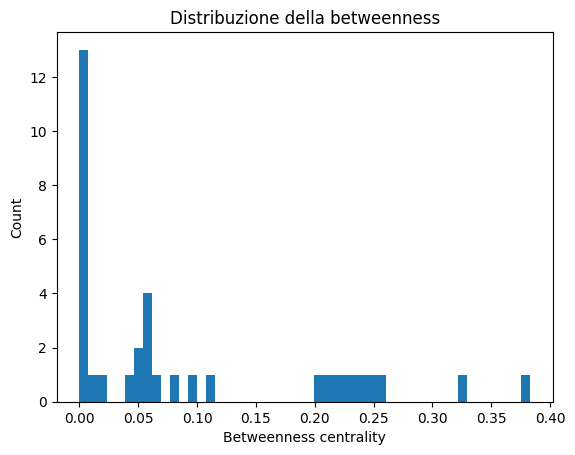

In [34]:

plt.hist(df_analisi_grafo['Betweenness Centrality'], bins=50)
plt.xlabel("Betweenness centrality")
plt.ylabel("Count")
plt.title("Distribuzione della betweenness")
plt.savefig("betweenness.png")
plt.show()

<h2>Scatter Plot Degree vs Betweenness</h2>

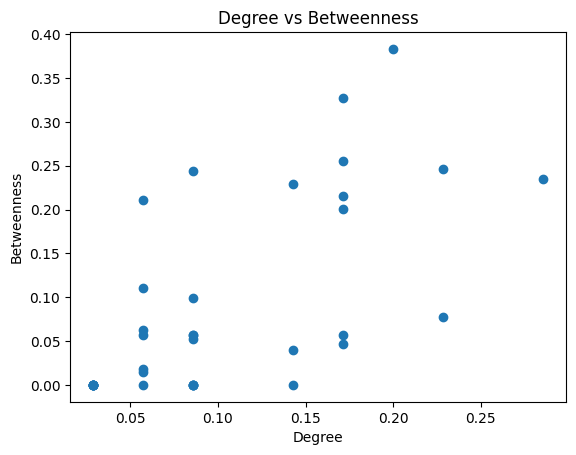

In [35]:
plt.scatter(df_analisi_grafo['Degree Centrality'], df_analisi_grafo['Betweenness Centrality'])
plt.xlabel("Degree")
plt.ylabel("Betweenness")
plt.title("Degree vs Betweenness")
plt.savefig("degree_vs_betweenness.png")
plt.show()

<h2>Grafico della closeness</h2>

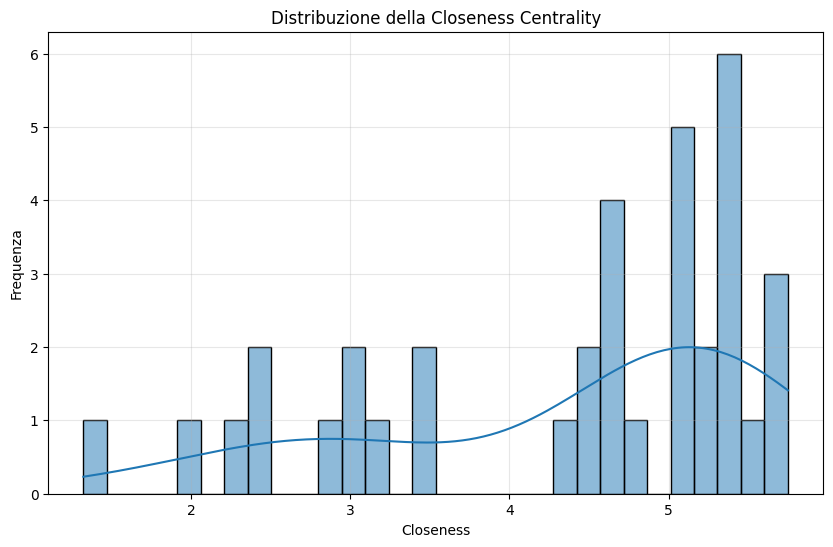

In [36]:
# --- Grafico combinato: Istogramma + KDE ---
plt.figure(figsize=(10, 6))
sns.histplot(df_analisi_grafo["Closeness Centrality"], kde=True, bins=30)
plt.title("Distribuzione della Closeness Centrality")
plt.xlabel("Closeness")
plt.ylabel("Frequenza")
plt.grid(True, alpha=0.3)
plt.savefig("distribuzione_closeness.png")
plt.show()

<h2>Degree vs Closeness</h2>

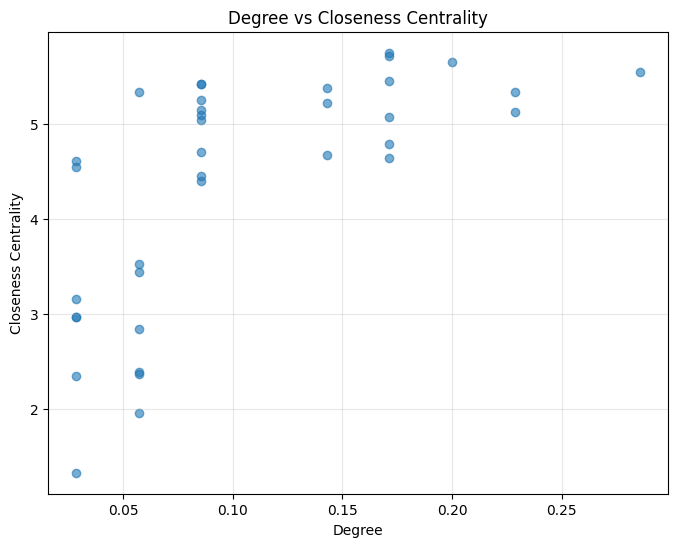

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(df_analisi_grafo["Degree Centrality"], df_analisi_grafo["Closeness Centrality"], alpha=0.6)
plt.title("Degree vs Closeness Centrality")
plt.xlabel("Degree")
plt.ylabel("Closeness Centrality")
plt.grid(True, alpha=0.3)
plt.savefig("degree_vs_closeness.png")
plt.show()

<h2>Betweenness vs Closeness</h2>

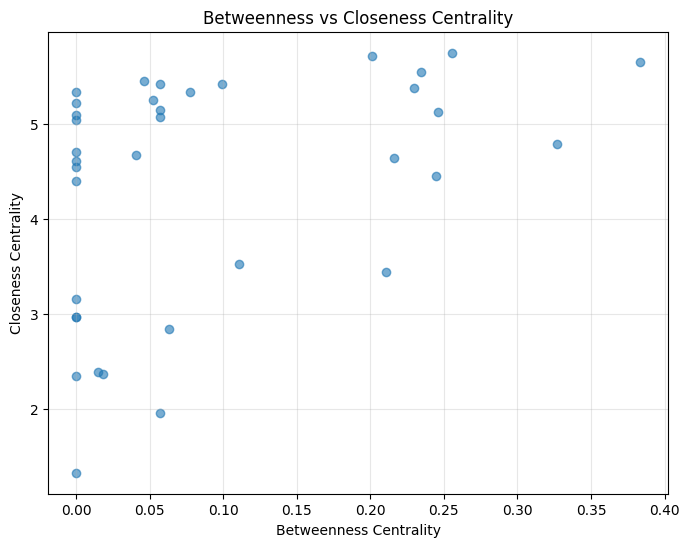

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(df_analisi_grafo["Betweenness Centrality"], df_analisi_grafo["Closeness Centrality"], alpha=0.6)
plt.title("Betweenness vs Closeness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Closeness Centrality")
plt.grid(True, alpha=0.3)
plt.savefig("betweenness_vs_closeness.png")
plt.show()